# Project Report - Group 108

### Introduction

For our project we will analyze player stats for the Top 500 tennis players. Tennis is a racket sport played on courts everywhere. Some major tournaments include Wimbledon, US Open, Australian Open, and French Open. Our dataset contains a variety of information including the player’s age, handedness, name, height, seasons, etc.

In this project, we aim to answer the following question:

> **Can you predict a tennis player's career earnings based on their profile?**

Include why we want to research this.


### Preliminary Data Analysis

In [91]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(dplyr)
library(cowplot)

In [33]:
set.seed(108)

In [34]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
tennis <- read_csv(url)
head(tennis, n = 8)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


For our analysis, the columns of interest are: 

1. Age
2. Best Rank 
3. Current Rank
4. Seasons Played
5. Prize Money

The first four are predictors and prize money is the target variable. These variables were selected because they have a substantial amount of observations compared to other variables which contained mostly empty cells.

To tidy the data, we first isolated the five variables of interest for our analysis.

In [35]:
colnames(tennis) <- make.names(colnames(tennis))
tennis <- tennis |>
    select(Age,  Current.Rank, Best.Rank, Prize.Money, Seasons)|>
    separate(col = Age,
             into= c("age", "Date"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Current.Rank,
             into= c("current_rank", "date_of_rank"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Best.Rank,
             into= c("best_rank", "date_or_best_rank"),
             sep = " ",
            convert = TRUE) |>
    select(age, current_rank, best_rank, Prize.Money, Seasons)
head(tennis, n = 8)

age,current_rank,best_rank,Prize.Money,Seasons
<int>,<int>,<int>,<chr>,<dbl>
26,378,363,NA,NA
18,326,316,"$59,040",NA
32,178,44,"US$3,261,567",14
21,236,130,"$374,093",2
27,183,17,"US$6,091,971",11
22,31,31,"$1,517,157",5
28,307,213,"$278,709",1
21,232,229,"$59,123",1


Since the prize money variable had variety of text that were not useful to us, we had to remove each string individually from the data frame by replacing it with the empty string.

Once that was done, we renamed the variables, converted prize_money to a numeric vector and removed all the empty observations in the data frame.

In [36]:
tennis$Prize.Money <- gsub("US", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("all-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("11th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("10th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("14th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("27th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("15th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("30th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("All-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("4th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("28th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("2nd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("6th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("33rd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("26th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("48th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("41st", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("\\$","", tennis$Prize.Money)
tennis$Prize.Money <- sub(" ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("   ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("  ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub(" all-time in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub(",", "", tennis$Prize.Money)

tennis <- tennis |>
    rename(seasons_played = Seasons) |>
    mutate(prize_money = as.numeric(Prize.Money)) |>
    select(age, current_rank, best_rank, seasons_played, prize_money) |>
    na.omit()
head(tennis, n = 8)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,current_rank,best_rank,seasons_played,prize_money
<int>,<int>,<int>,<dbl>,<dbl>
32,178,44,14,3261567
21,236,130,2,374093
27,183,17,11,6091971
22,31,31,5,1517157
28,307,213,1,278709
21,232,229,1,59123
25,417,253,5,122734
20,104,104,3,74927


To create and evaluate our model, we will split the data into training (75 %) the testing (25 %) datasets. The seed has been set to 108 after loading in the packages so that the split performed in this project will be reproducible.

In [37]:
tennis_split <- initial_split(tennis, prop = .75, strata = prize_money)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

In [38]:
tennis_summary_mean <- tennis_train |>
    map_df(mean)
tennis_summary_max <- tennis_train |>
    map_df(max)
tennis_summary_min <- tennis_train |>
    map_df(min)
tennis_summary_med <- tennis_train |>
    map_df(median)

kable(tennis_summary_mean, format = "simple", padding = 2,
      caption = "Table 1.1 : The mean of each variable in the training data")

kable(tennis_summary_med, format = "simple", padding = 2,
      caption = "Table 1.2 : The median of each variable in the training data")


kable(tennis_summary_max, format = "simple", padding = 2,
      caption = "Table 1.3 : The maximum value of each variable in the training data") 


kable(tennis_summary_min, format = "simple", padding = 2,
      caption = "Table 1.4 : The minimum value of each variable in the training data")



Table: Table 1.1 : The mean of each variable in the training data

       age    current_rank    best_rank    seasons_played    prize_money
----------  --------------  -----------  ----------------  -------------
  26.79121        203.4139     126.5421          6.589744        4419518



Table: Table 1.2 : The median of each variable in the training data

  age    current_rank    best_rank    seasons_played    prize_money
-----  --------------  -----------  ----------------  -------------
   26             179           98                 5         650117



Table: Table 1.3 : The maximum value of each variable in the training data

  age    current_rank    best_rank    seasons_played    prize_money
-----  --------------  -----------  ----------------  -------------
   40             499          488                22      181254572



Table: Table 1.4 : The minimum value of each variable in the training data

  age    current_rank    best_rank    seasons_played    prize_money
-----  --------------  -----------  ----------------  -------------
   18               2            1                 1           2893

The predictors have different ranges, therefore they must be standardized in the model to prevent predictor variables with the larger scale (current rank and best rank) from having a greater affect than the predictor variables with a smaller scale (age and seasons played). For Best Rank and Prize Money, the mean is much greater than the median, indicating possible outliers that are increasing the average. Furthermore, Table 1.3 and 1.4 indicate the ranges for the predictor variables that will be valid for our model as we cannot extrapolate when usign K-nearest neighbour regression.

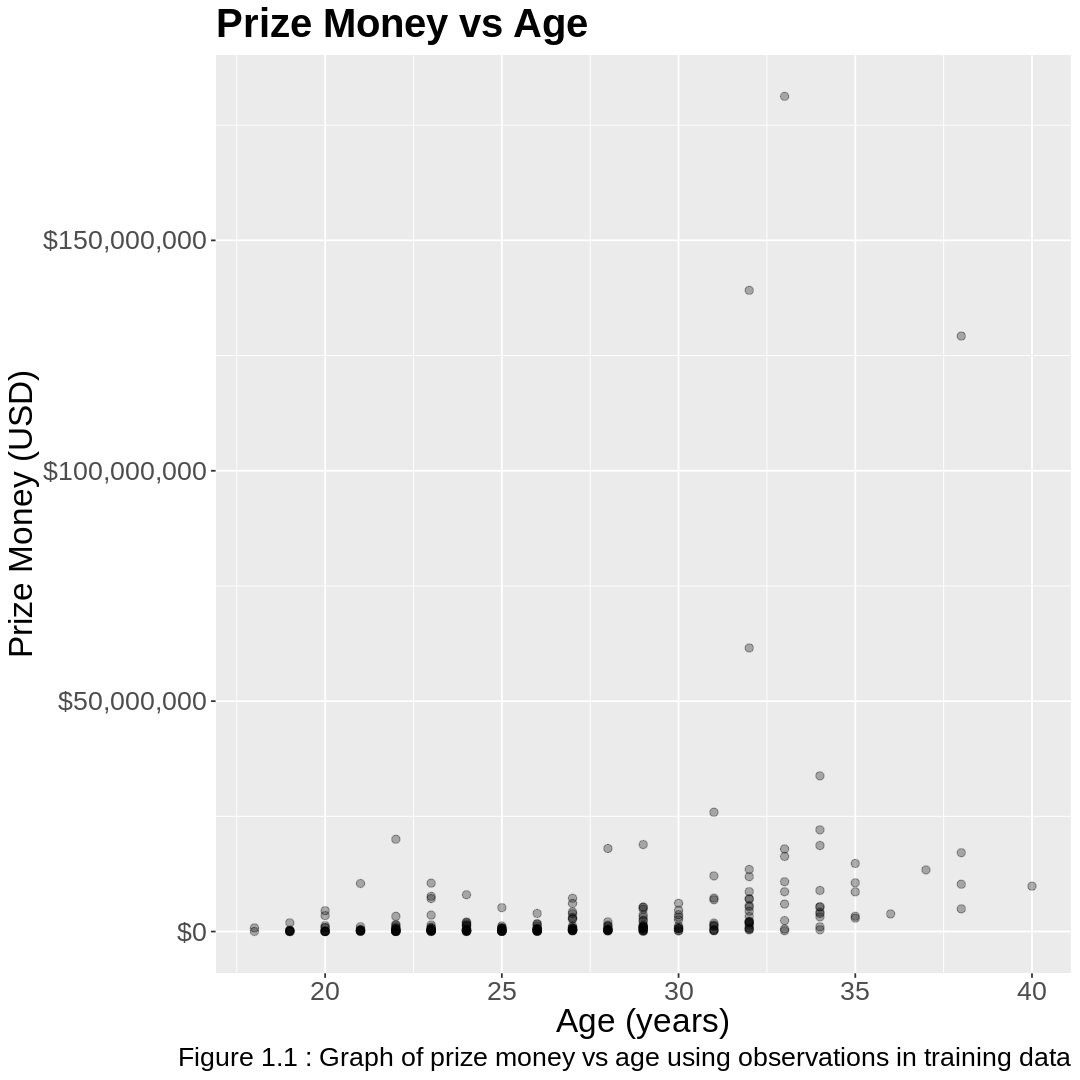

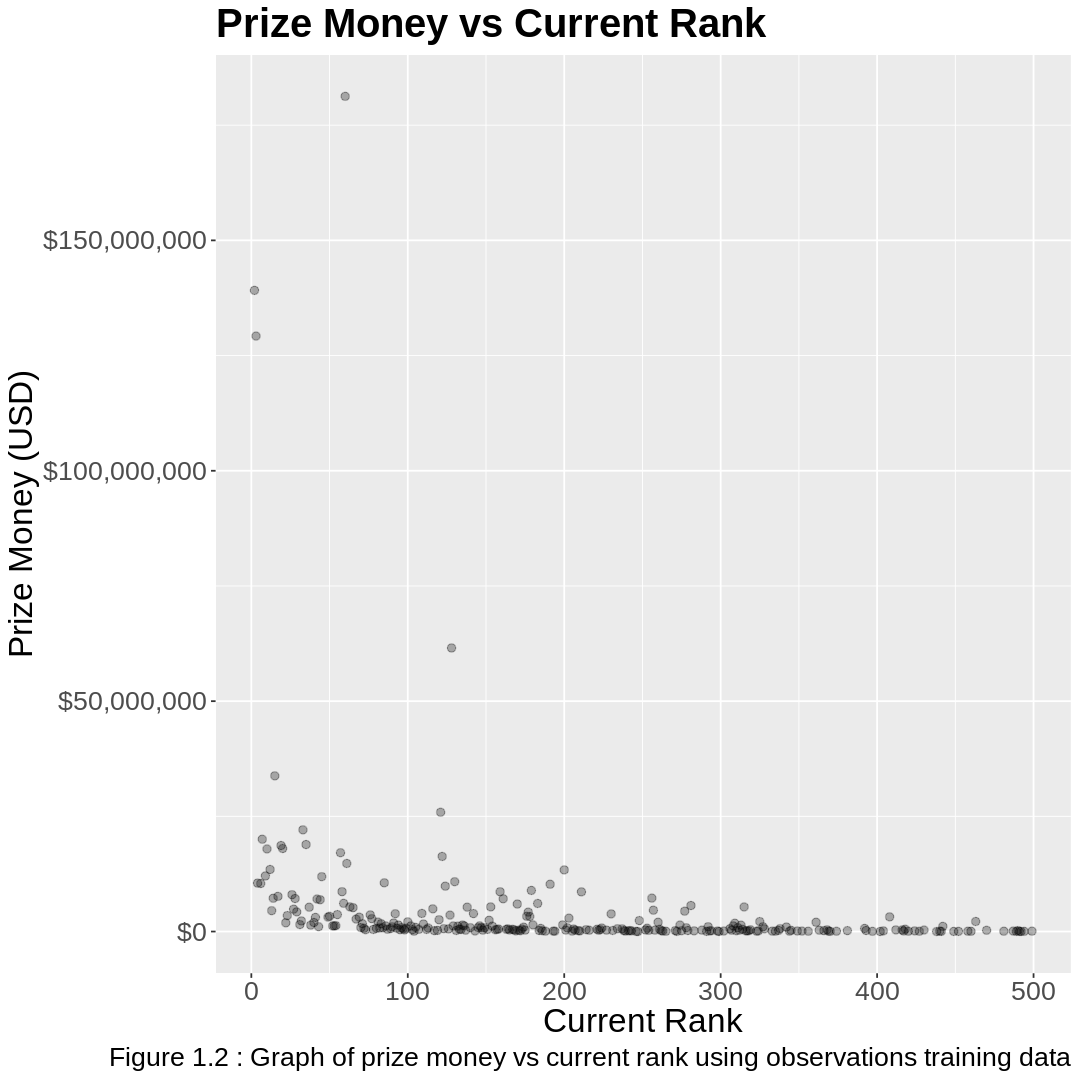

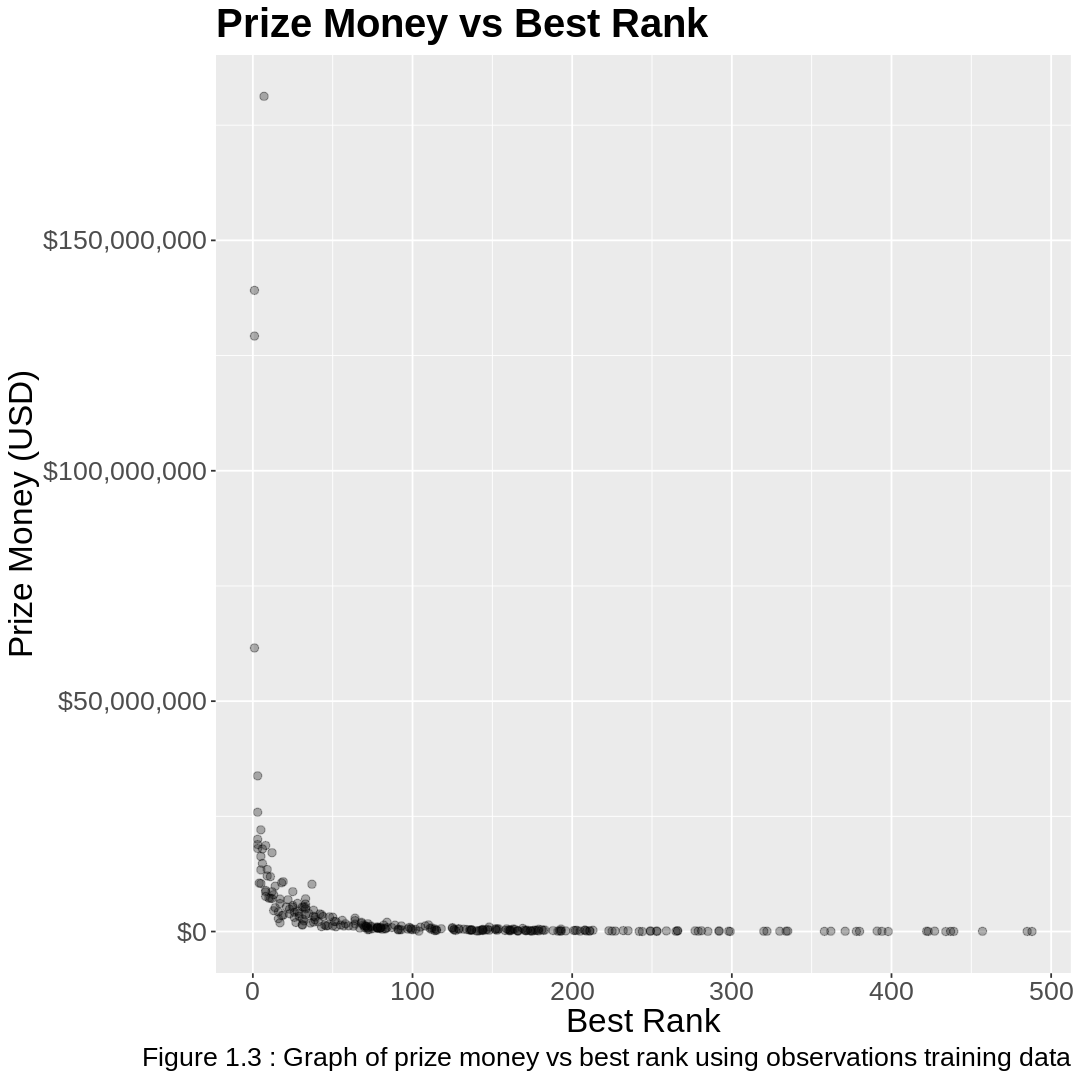

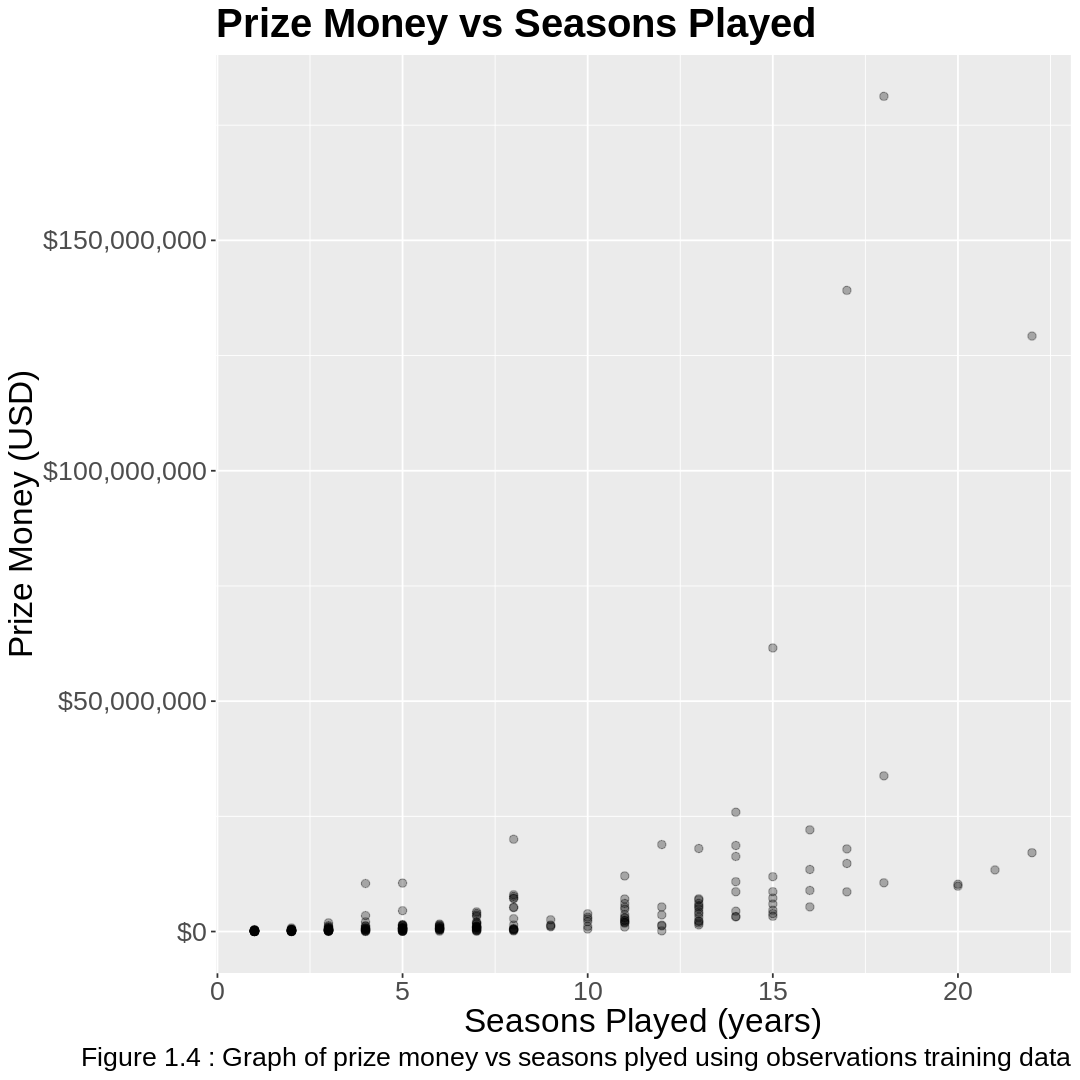

In [84]:
options(repr.plot.width = 9, repr.plot.height = 9)

ggplot(tennis_train, aes(x=age,y=prize_money))+
    geom_point(alpha = 0.3, size = 2)+
    labs(title = "Prize Money vs Age", x="Age (years)", y = "Prize Money (USD)",
        caption = "Figure 1.1 : Graph of prize money vs age using observations in training data") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

ggplot(tennis_train, aes(x=current_rank,y=prize_money))+
    geom_point(alpha = 0.3, size = 2) +
    labs(title = "Prize Money vs Current Rank", x="Current Rank", y = "Prize Money (USD)", 
        caption = "Figure 1.2 : Graph of prize money vs current rank using observations training data") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

ggplot(tennis_train, aes(x=best_rank,y=prize_money))+
    geom_point(alpha = 0.3, size = 2)+
    labs(title = "Prize Money vs Best Rank", x="Best Rank", y = "Prize Money (USD)",
        caption = "Figure 1.3 : Graph of prize money vs best rank using observations training data") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

ggplot(tennis_train, aes(x=seasons_played,y=prize_money))+
    geom_point(alpha = 0.3, size = 2)+
    labs(title = "Prize Money vs Seasons Played", x="Seasons Played (years)", y = "Prize Money (USD)",
        caption = "Figure 1.4 : Graph of prize money vs seasons plyed using observations training data") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

Age and Seasons Played have a positive, exponential relationship with Prize Money, while Best and Current Rank have a negative, exponential decay relationship. We observe prize money to increase as seasons played and age increase. We also observe prize money to decrease as best rank and current rank increase. Furthermore, all plots display four outliers with lots of Prize Money. 

### Methods

First we will create a recipe for each predictor variable as well as `tennis_recipe` which contains all the predictor variables. We created a recipe for each predictor variable because we want to analyze how each predictor is able to predict a tennis player's prize money. Each recipe will standardize (scale and center) all the predictors in the model.

In [122]:
tennis_recipe <- recipe(prize_money ~ age + best_rank + current_rank + seasons_played, data = tennis_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

tennis_recipe_age <- recipe(prize_money ~ age, data = tennis_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

tennis_recipe_best_rank <- recipe(prize_money ~ best_rank, data = tennis_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

tennis_recipe_current_rank <- recipe(prize_money ~ current_rank, data = tennis_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

tennis_recipe_seasons_played <- recipe(prize_money ~ seasons_played, data = tennis_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

Next we will create a KNN regression model to tune the number of neighbours called `tennis_spec_tune`

In [124]:
tennis_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")
tennis_spec_tune

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Below, we will create the workflow the model that only has age as the predictor variable.

In [125]:
tennis_wkflw_age_tune <- workflow() |>
    add_recipe(tennis_recipe_age) |>
    add_model(tennis_spec_tune)
tennis_wkflw_age_tune

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Once we have created the model workflow, we will use a 5 fold cross validation with parameter (neighbour) values from 1 to 150 to determine the optimal number of neighbours when using only age as the predictor variable.

In [43]:
# This can be reused to cross validate other variables
tennis_vfold <- vfold_cv(tennis_train, v = 5, strata = prize_money)

# This can be reused to find optimal number of neighbours for other variables
gridvals <- tibble(neighbors = seq(from = 1, to = 150, by = 3))

age_results <- tennis_wkflw_age_tune |>
    tune_grid(resamples = tennis_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
head(age_results, n = 8)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,17559579,5,5217103,Preprocessor1_Model01
4,rmse,standard,13516297,5,4848371,Preprocessor1_Model02
7,rmse,standard,14173945,5,4424222,Preprocessor1_Model03
10,rmse,standard,13338836,5,4754825,Preprocessor1_Model04
13,rmse,standard,12778535,5,4839757,Preprocessor1_Model05
16,rmse,standard,13315750,5,4593152,Preprocessor1_Model06
19,rmse,standard,13495721,5,4547968,Preprocessor1_Model07
22,rmse,standard,13724204,5,4318301,Preprocessor1_Model08


Since we want to use the number of neighbours with the lowest rmse we will filter for the minimum and pull the number of neighbours out from the data frame. This will be the number of neighbours used for our final model with age as the only predictor variable as it is our best estimate for minimizing rmspe.

In [126]:
kmin_age_df <- age_results |>
    filter(mean == min(mean))
kmin_age_df

kmin_age <- kmin_age_df |>
    pull(neighbors)
kmin_age

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
100,rmse,standard,12350066,5,5046899,Preprocessor1_Model34


[1] 100

Now that we have our optimal parameter valued selected we can retrain the KNN regression model on the training data using 100 neighbours and then evalute the model using the testing data

In [127]:
tennis_spec_age <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin_age)|>
    set_engine("kknn") |>
    set_mode("regression")

tennis_fit_age <- workflow() |>
    add_recipe(tennis_recipe_age) |>
    add_model(tennis_spec_age) |>
    fit(data = tennis_train)

age_preds <- tennis_fit_age |>
    predict(tennis_test) |>
    bind_cols(tennis_test)

age_summary <- age_preds |>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")
age_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,12431335


The final model with only the age variable as the predictor has an RMSPE of $12,431,335.

Here is a visualization of the final model.

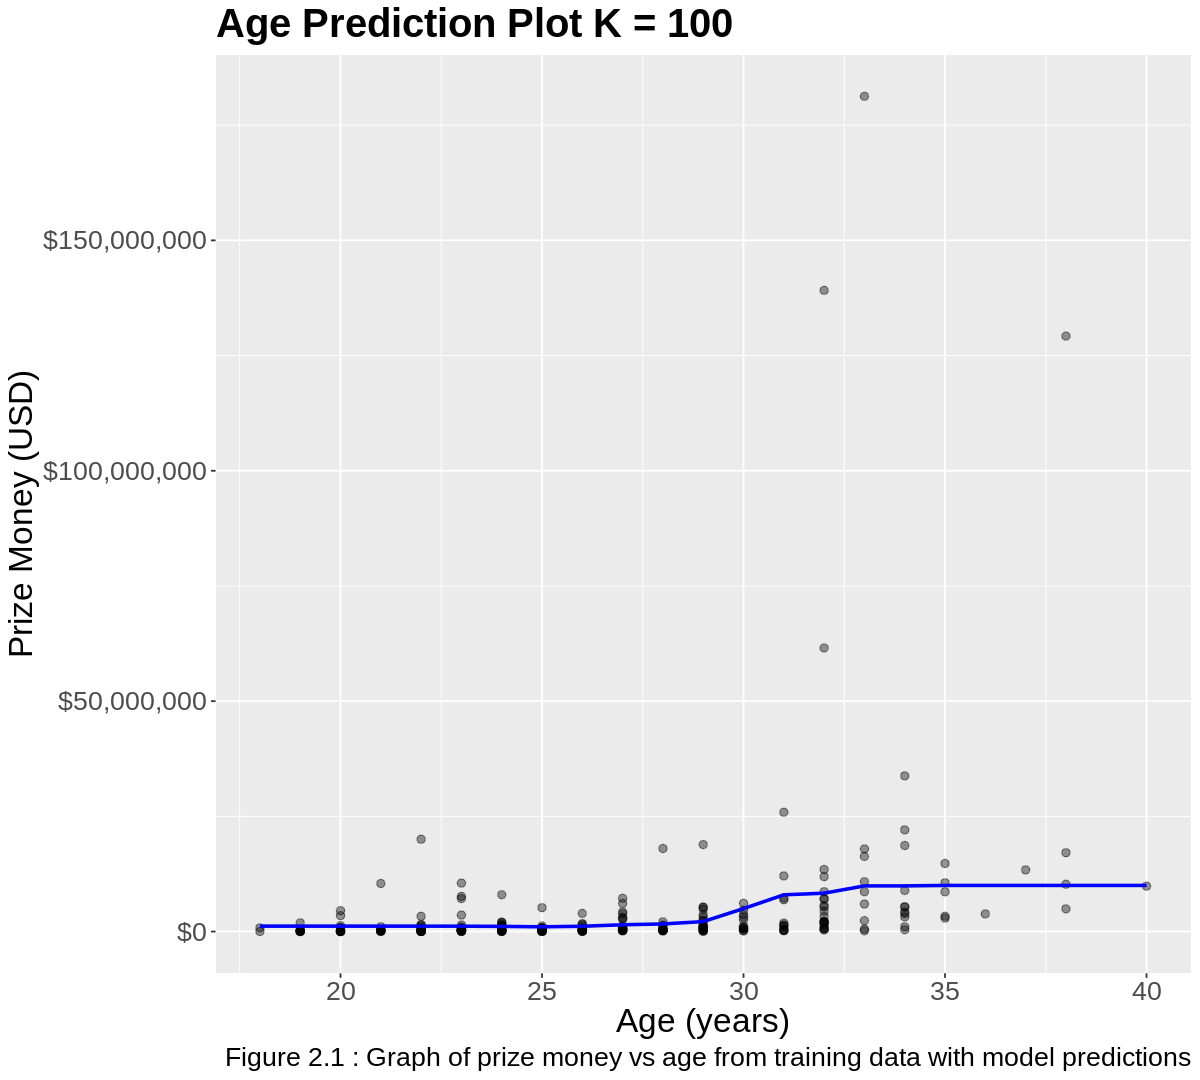

In [128]:
options(repr.plot.width = 10, repr.plot.height = 9)

age_train_info <- tennis_fit_age |>
    predict(tennis_train) |>
    bind_cols(tennis_train)

age_plot <- tennis_train |>
    ggplot(aes(x = age, y = prize_money)) +
    geom_point(alpha = 0.4, size = 2) +
    geom_line(data = age_train_info, 
              mapping = aes(x = age, y = .pred),
              color = "blue",
              size = 1) +
    labs(x = "Age (years)", y = "Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    ggtitle("Age Prediction Plot K = 100") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))
age_plot +
    labs(caption = "Figure 2.1 : Graph of prize money vs age from training data with model predictions")

We will repeat the steps above with the other three variables to determine their RMSPE.

Here is the same process for the Current Rank predictor variable

In [129]:
tennis_wkflw_current_rank_tune <- workflow() |>
    add_recipe(tennis_recipe_current_rank) |>
    add_model(tennis_spec_tune)
tennis_wkflw_current_rank_tune

current_rank_results <- tennis_wkflw_current_rank_tune |>
    tune_grid(resamples = tennis_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
head(current_rank_results, n = 8)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,16617889,5,5747205,Preprocessor1_Model01
4,rmse,standard,15366893,5,3965714,Preprocessor1_Model02
7,rmse,standard,14101910,5,4072586,Preprocessor1_Model03
10,rmse,standard,13536223,5,4358208,Preprocessor1_Model04
13,rmse,standard,13029958,5,4620259,Preprocessor1_Model05
16,rmse,standard,12661329,5,4771411,Preprocessor1_Model06
19,rmse,standard,12453886,5,4900118,Preprocessor1_Model07
22,rmse,standard,12345177,5,4994729,Preprocessor1_Model08


In [130]:
kmin_current_rank_df <- current_rank_results |>
    filter(mean == min(mean))
kmin_current_rank_df

kmin_current_rank <- kmin_current_rank_df |>
    pull(neighbors)
kmin_current_rank

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
31,rmse,standard,12058461,5,4982227,Preprocessor1_Model11


[1] 31

Here we see that the optimal number of neighbours in this case is 31.

In [131]:
tennis_spec_current_rank <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin_current_rank)|>
    set_engine("kknn") |>
    set_mode("regression")

tennis_fit_current_rank <- workflow() |>
    add_recipe(tennis_recipe_current_rank) |>
    add_model(tennis_spec_current_rank) |>
    fit(data = tennis_train)

current_rank_preds <- tennis_fit_current_rank |>
    predict(tennis_test) |>
    bind_cols(tennis_test)

current_rank_summary <- current_rank_preds |>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")
current_rank_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11442320


The final model with only the age variable as the predictor has an RMSPE of $11,442,320.

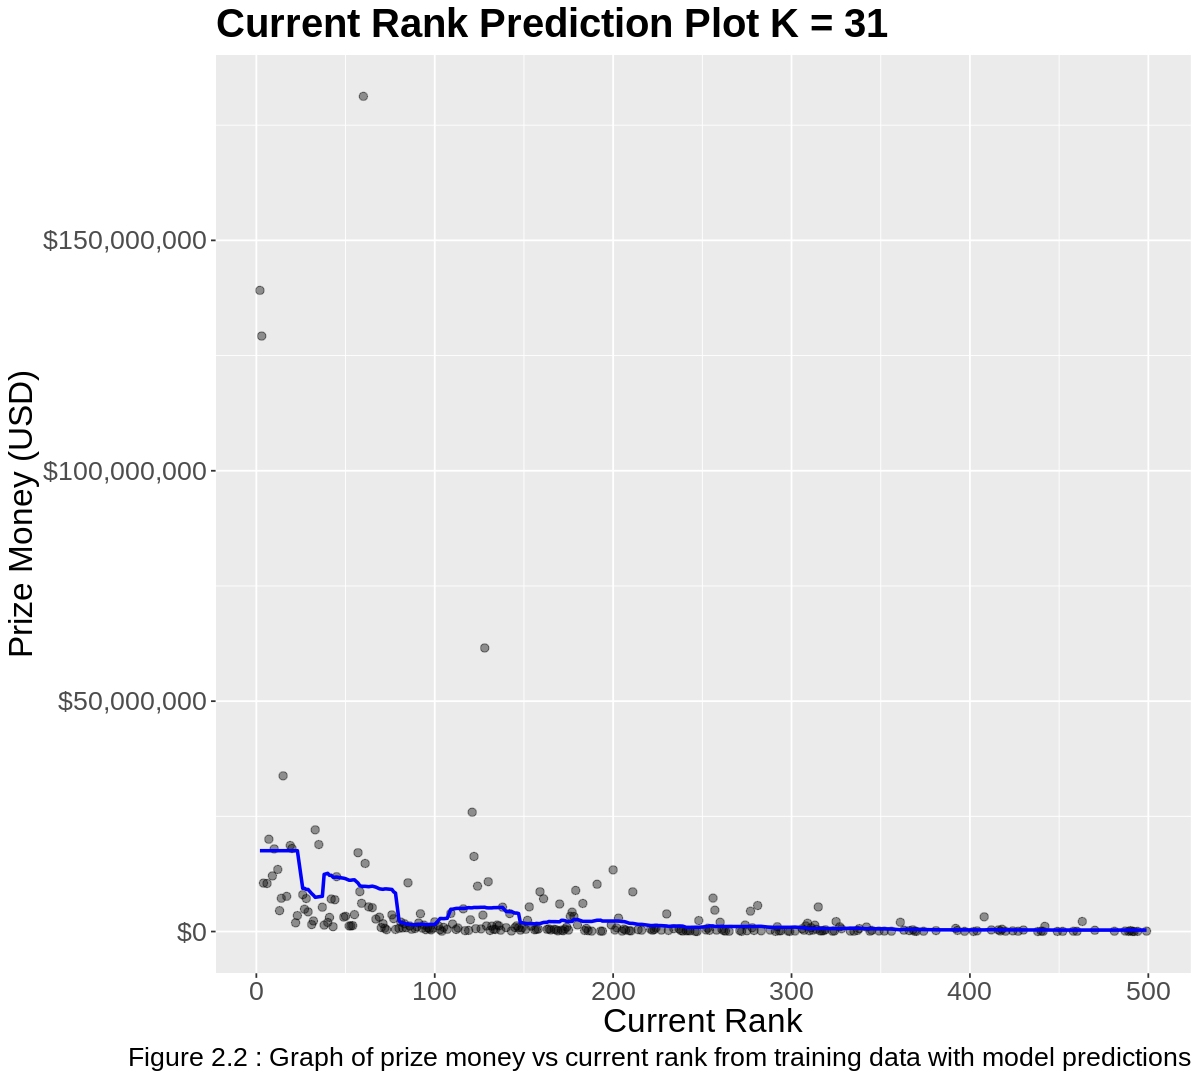

In [132]:
options(repr.plot.width = 10, repr.plot.height = 9)

current_rank_plot_info <- tennis_fit_current_rank |>
    predict(tennis_train) |>
    bind_cols(tennis_train)

current_rank_plot <- tennis_train |>
    ggplot(aes(x = current_rank, y = prize_money)) +
    geom_point(alpha = 0.4, size = 2) +
    geom_line(data = current_rank_plot_info, 
              mapping = aes(x = current_rank, y = .pred),
              color = "blue", 
              size = 1) +
    labs(x = "Current Rank", y = "Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    ggtitle("Current Rank Prediction Plot K = 31") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))
current_rank_plot +
    labs(caption = "Figure 2.2 : Graph of prize money vs current rank from training data with model predictions")

Below is the code for creating the model with only the best rank predictor variable.

In [133]:
tennis_wkflw_best_rank_tune <- workflow() |>
    add_recipe(tennis_recipe_best_rank) |>
    add_model(tennis_spec_tune)
tennis_wkflw_best_rank_tune

best_rank_results <- tennis_wkflw_best_rank_tune |>
    tune_grid(resamples = tennis_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
head(best_rank_results, n = 8)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,9241075,5,4395062,Preprocessor1_Model01
4,rmse,standard,10975667,5,4220932,Preprocessor1_Model02
7,rmse,standard,11265898,5,4272864,Preprocessor1_Model03
10,rmse,standard,11762559,5,4128189,Preprocessor1_Model04
13,rmse,standard,11601805,5,3889450,Preprocessor1_Model05
16,rmse,standard,11879994,5,3950229,Preprocessor1_Model06
19,rmse,standard,11258034,5,3982921,Preprocessor1_Model07
22,rmse,standard,11265888,5,4140706,Preprocessor1_Model08


In [134]:
kmin_best_rank_df <- best_rank_results |>
    filter(mean == min(mean))
kmin_best_rank_df

kmin_best_rank <- kmin_best_rank_df |>
    pull(neighbors)
kmin_best_rank

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,9241075,5,4395062,Preprocessor1_Model01


[1] 1

Here we observe that the optimal number of neighbours is 1, however, that would overfit the data as it is essentially matching it to the closest observation. Thus, we will use 4, the closest value to 1, as the optimal number of neighbours.

In [135]:
tennis_spec_best_rank <- nearest_neighbor(weight_func = "rectangular", neighbors = 4)|>
    set_engine("kknn") |>
    set_mode("regression")

tennis_fit_best_rank <- workflow() |>
    add_recipe(tennis_recipe_best_rank) |>
    add_model(tennis_spec_best_rank) |>
    fit(data = tennis_train)

best_rank_preds <- tennis_fit_best_rank |>
    predict(tennis_test) |>
    bind_cols(tennis_test)

best_rank_summary <- best_rank_preds |>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")
best_rank_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7117628


The final model with only the best rank variable as the predictor has an RMSPE of $7,117,628.

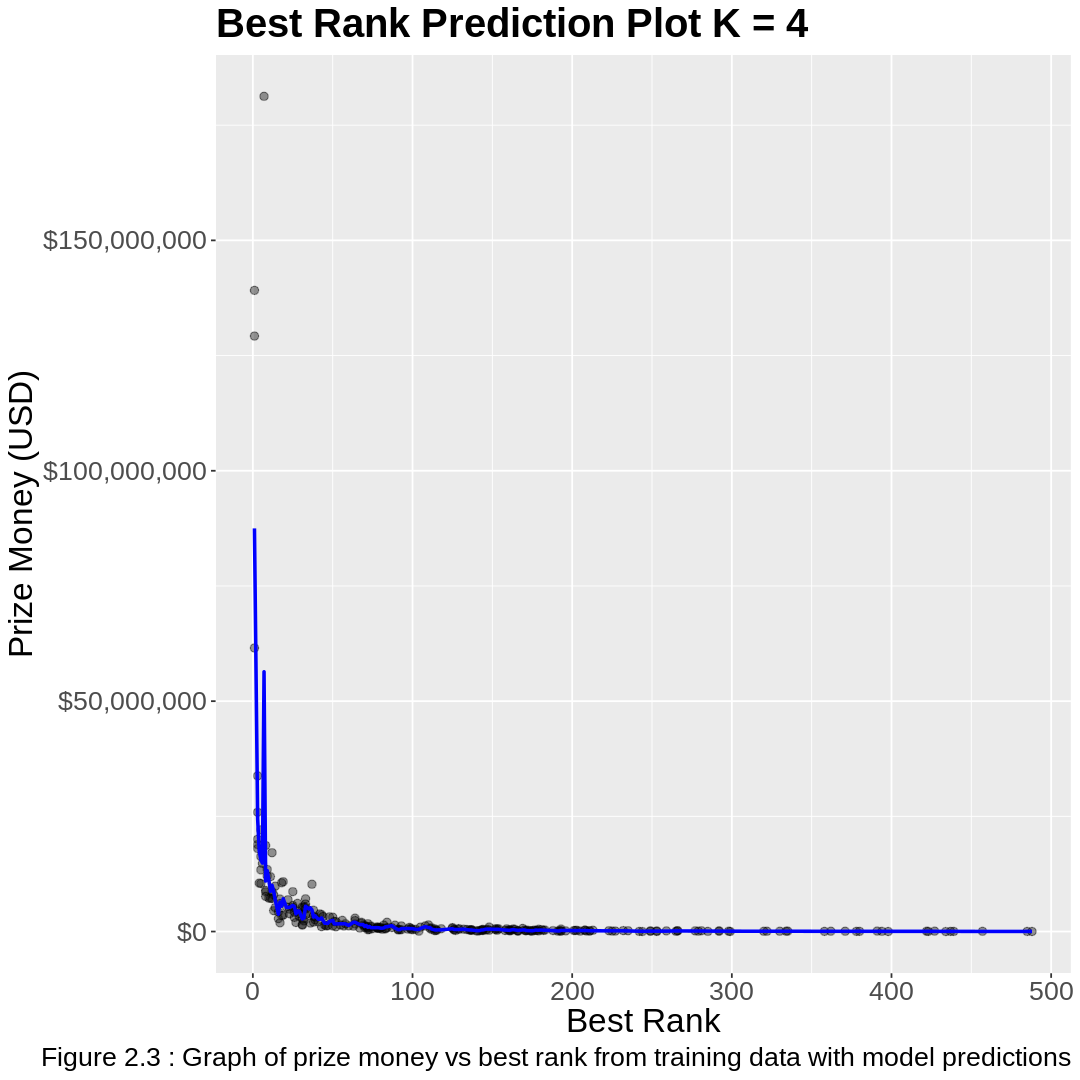

In [104]:
options(repr.plot.width = 9, repr.plot.height = 9)

best_rank_plot_info <- tennis_fit_best_rank |>
    predict(tennis_train) |>
    bind_cols(tennis_train)

best_rank_plot <- tennis_train |>
    ggplot(aes(x = best_rank, y = prize_money)) +
    geom_point(alpha = 0.4, size = 2) +
    geom_line(data = best_rank_plot_info, 
              mapping = aes(x = best_rank, y = .pred),
              color = "blue",
              size = 1) +
    labs(x = "Best Rank", y = "Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    ggtitle("Best Rank Prediction Plot K = 4") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))
best_rank_plot +
    labs(caption = "Figure 2.3 : Graph of prize money vs best rank from training data with model predictions")

In [136]:
tennis_wkflw_seasons_played_tune <- workflow() |>
    add_recipe(tennis_recipe_seasons_played) |>
    add_model(tennis_spec_tune)
tennis_wkflw_seasons_played_tune

seasons_played_results <- tennis_wkflw_seasons_played_tune |>
    tune_grid(resamples = tennis_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
head(seasons_played_results, n = 8)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,18242301,5,4094935,Preprocessor1_Model01
4,rmse,standard,13709278,5,3438365,Preprocessor1_Model02
7,rmse,standard,13341835,5,3421494,Preprocessor1_Model03
10,rmse,standard,12541529,5,3656944,Preprocessor1_Model04
13,rmse,standard,12132513,5,4059473,Preprocessor1_Model05
16,rmse,standard,11746407,5,4241722,Preprocessor1_Model06
19,rmse,standard,11813511,5,4323675,Preprocessor1_Model07
22,rmse,standard,11686355,5,4399543,Preprocessor1_Model08


In [137]:
kmin_seasons_played_df <- seasons_played_results |>
    filter(mean == min(mean))
kmin_seasons_played_df

kmin_seasons_played <- kmin_seasons_played_df |>
    pull(neighbors)
kmin_seasons_played

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,rmse,standard,11445569,5,4443644,Preprocessor1_Model09


[1] 25

In [138]:
tennis_spec_seasons_played <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin_seasons_played)|>
    set_engine("kknn") |>
    set_mode("regression")

tennis_fit_seasons_played <- workflow() |>
    add_recipe(tennis_recipe_seasons_played) |>
    add_model(tennis_spec_seasons_played) |>
    fit(data = tennis_train)

seasons_played_preds <- tennis_fit_seasons_played |>
    predict(tennis_test) |>
    bind_cols(tennis_test)

seasons_played_summary <- seasons_played_preds |>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")
seasons_played_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,10518039


The final model with only the seasons played variable as the predictor has an RMSPE of $10,518,039.

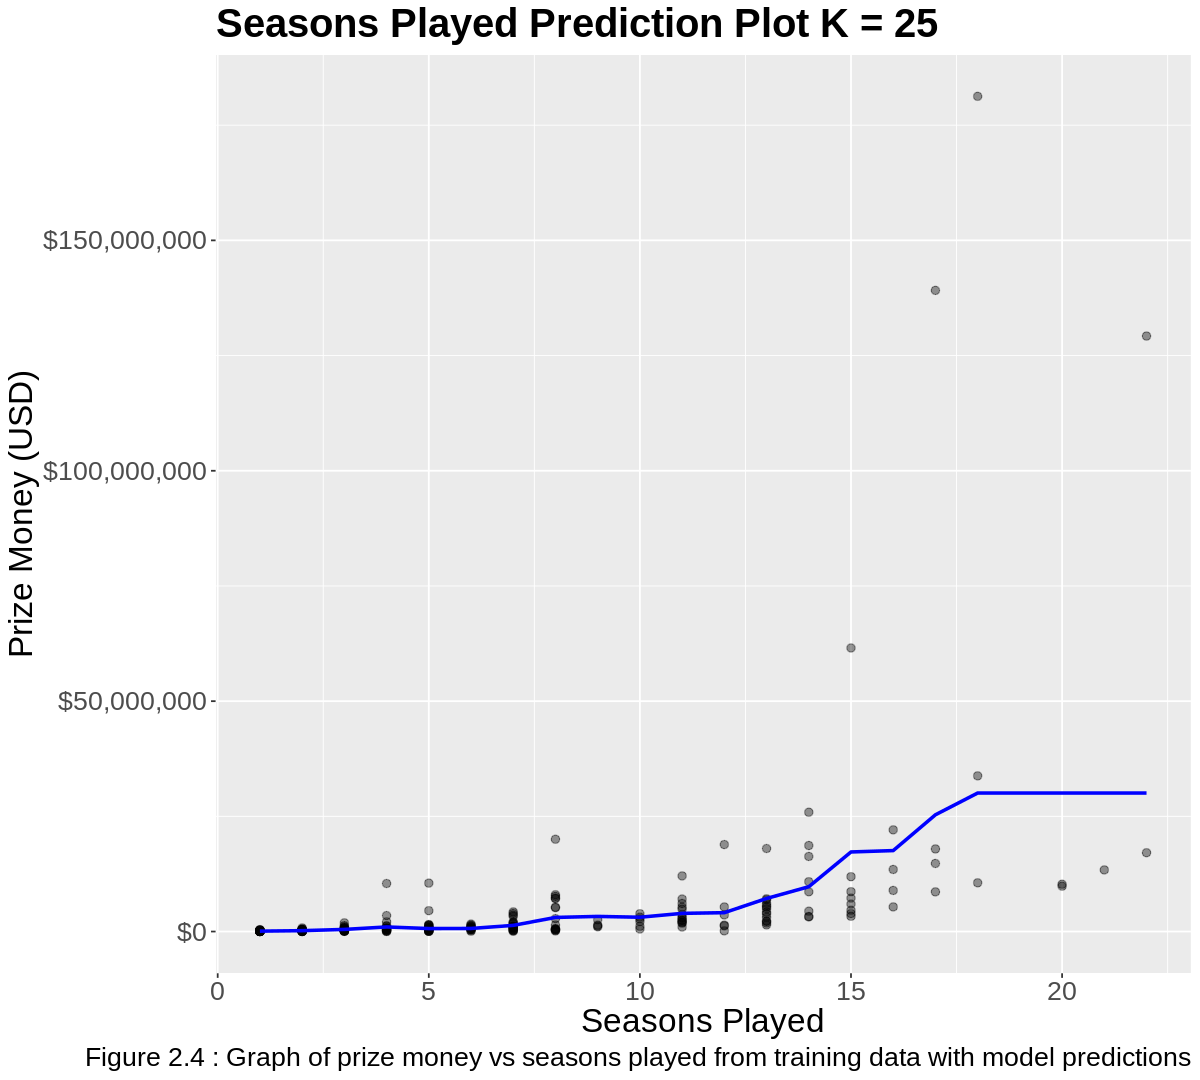

In [139]:
options(repr.plot.width = 10, repr.plot.height = 9)

seasons_played_plot_info <- tennis_fit_seasons_played |>
    predict(tennis_train) |>
    bind_cols(tennis_train)

seasons_played_plot <- tennis_train |>
    ggplot(aes(x = seasons_played, y = prize_money)) +
    geom_point(alpha = 0.4, size = 2) +
    geom_line(data = seasons_played_plot_info, 
              mapping = aes(x = seasons_played, y = .pred),
              color = "blue",
              size = 1) +
    labs(x = "Seasons Played", y = "Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    ggtitle("Seasons Played Prediction Plot K = 25") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))
seasons_played_plot +
    labs(caption = "Figure 2.4 : Graph of prize money vs seasons played from training data with model predictions")

In [140]:
tennis_wkflw_tune <- workflow() |>
    add_recipe(tennis_recipe) |>
    add_model(tennis_spec_tune)
tennis_wkflw_tune

tennis_results <- tennis_wkflw_tune |>
    tune_grid(resamples = tennis_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
head(tennis_results, n = 8)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,19028004,5,1602190,Preprocessor1_Model01
4,rmse,standard,12699569,5,3613730,Preprocessor1_Model02
7,rmse,standard,12111690,5,3184021,Preprocessor1_Model03
10,rmse,standard,11900487,5,3645128,Preprocessor1_Model04
13,rmse,standard,12555260,5,3663506,Preprocessor1_Model05
16,rmse,standard,12119616,5,4020960,Preprocessor1_Model06
19,rmse,standard,12055690,5,4187130,Preprocessor1_Model07
22,rmse,standard,11793095,5,4356586,Preprocessor1_Model08


In [141]:
kmin_df <- tennis_results |>
    filter(mean == min(mean))
kmin_df

kmin <- kmin_df |>
    pull(neighbors)
kmin

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
55,rmse,standard,11396448,5,5008139,Preprocessor1_Model19


[1] 55

In [142]:
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin)|>
    set_engine("kknn") |>
    set_mode("regression")

tennis_fit <- workflow() |>
    add_recipe(tennis_recipe) |>
    add_model(tennis_spec) |>
    fit(data = tennis_train)

tennis_preds <- tennis_fit |>
    predict(tennis_test) |>
    bind_cols(tennis_test)

tennis_summary <- tennis_preds |>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")
tennis_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11293724


The final model with all the precditor variables has an RMSPE of $11,293,724.

Now lets compare all the foiur visualizations side by side.

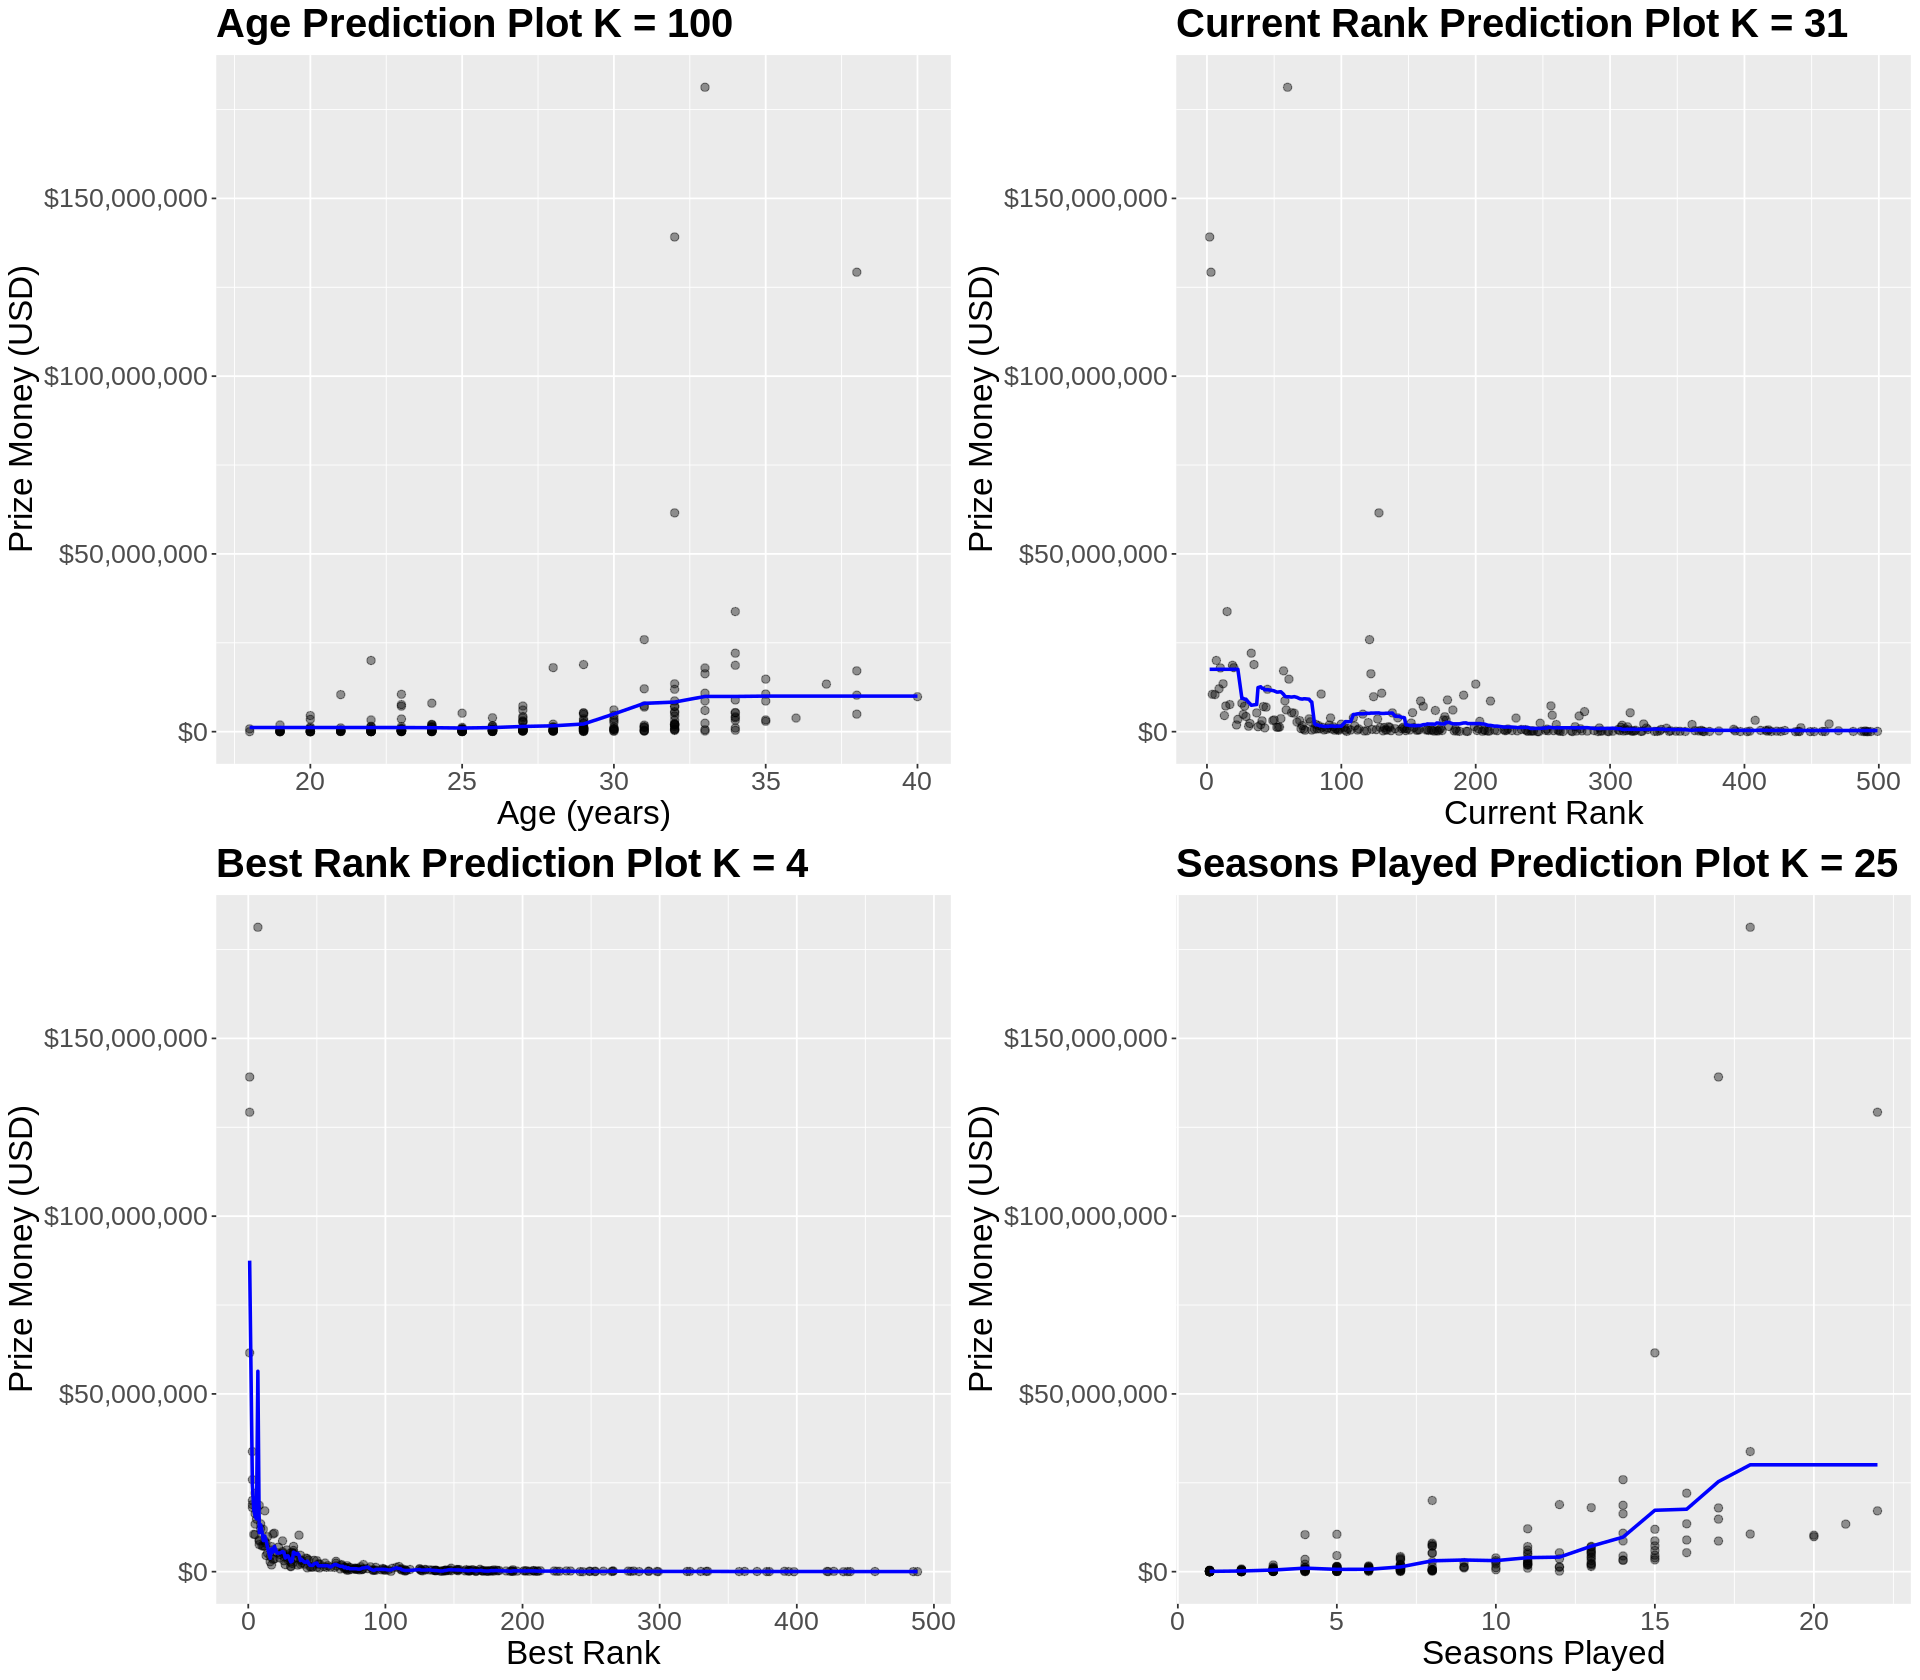

In [143]:
options(repr.plot.width = 16, repr.plot.height = 14)

plot_grid(age_plot, current_rank_plot, best_rank_plot, seasons_played_plot,  ncol = 2)

Furthermore, lets create a data frame that compares the RMSPE for each model including our final model which uses all the predictor variables.

In [144]:
age_rmspe <- age_summary |>
    pull(.estimate)

current_rank_rmspe <- current_rank_summary |>
    pull(.estimate)

best_rank_rmspe <- best_rank_summary |>
    pull(.estimate)

seasons_played_rmspe <- seasons_played_summary |>
    pull(.estimate)

final_model_rmspe <- tennis_summary |>
    pull(.estimate)

RMSPE <- c(age_rmspe, current_rank_rmspe, best_rank_rmspe, seasons_played_rmspe, final_model_rmspe)
Model <- c("Age", "Current Rank", "Best Rank", "Seasons Played", "Final Model")

comparison_df <- data.frame(Model, RMSPE) |>
    arrange(RMSPE)
comparison_df

Model,RMSPE
<chr>,<dbl>
Best Rank,7117628
Seasons Played,10518039
Final Model,11293724
Current Rank,11442320
Age,12431335


It seems that using all the predictors did not create the model with the smallest RMSPE, but rather the model with only best rank as the predictor variable. This could indicate that best rank as the strongest indicator for the total prize money that a tennis athlete can earn in their career.

### Expected Outcomes

We expect older, more experienced (i.e more seasons) players to have a better rank which leads to higher career earnings. This is because experience is integral for winning, thus more experienced players will have a higher chance of winning tournaments and earning more prize money. Moreover, playing for longer allows for more time to accumulate earnings.

We will create a model that accurately predicts future tennis players’ prize money based on their projected seasons played, best rank and retirement age. This model would be beneficial for future tennis players to visualize and understand their future goals for their tennis career.

> What other variables affect career earnings in tennis?

> How does tennis’s prize money model compare with other sports' prize money model?

### References

"Player Stats for Top 500 Players" was provided on UBC Canvas from https://www.ultimatetennisstatistics.com/
> Accessed from: https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS